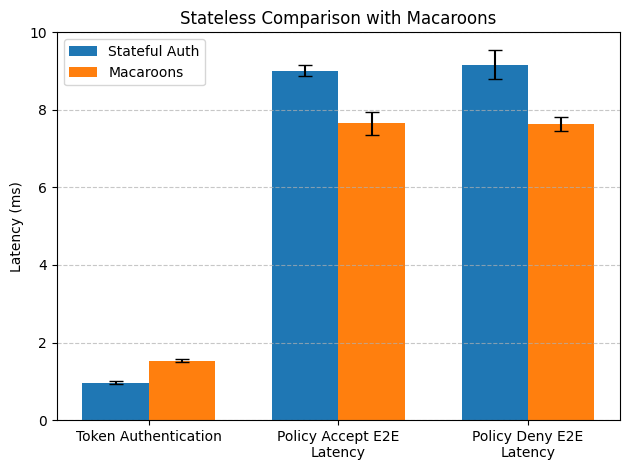

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

# Load the data
data = pd.read_csv('macaroon_same_region.csv')

# Grouping columns and calculating means and errors
means_macaroons = []
errors_macaroons = []
means_stateful_auth = []
errors_stateful_auth = []
custom_labels = ['Token Authentication', 'Policy Accept E2E Latency', 'Policy Deny E2E Latency']

# Select columns based on their index (0-indexed in Python)
macaroon_columns = [0, 2, 4]  # Columns 1, 3, 5
stateful_auth_columns = [1, 3, 5]  # Columns 2, 4, 6

# Compute means and errors for Macaroons
for i in macaroon_columns:
    means_macaroons.append(data.iloc[:, i].mean())
    errors_macaroons.append(data.iloc[:, i].std())

# Compute means and errors for Stateful Auth
for i in stateful_auth_columns:
    means_stateful_auth.append(data.iloc[:, i].mean())
    errors_stateful_auth.append(data.iloc[:, i].std())

# Create a bar graph
fig, ax = plt.subplots()
x = np.arange(len(custom_labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting
bars1 = ax.bar(x - width/2, means_macaroons, width, yerr=errors_macaroons, label='Stateful Auth', capsize=5)
bars2 = ax.bar(x + width/2, means_stateful_auth, width, yerr=errors_stateful_auth, label='Macaroons', capsize=5)

ax.set_ylabel('Latency (ms)')
ax.set_title('Stateless Comparison with Macaroons')

# Wrap text for each label
wrapped_labels = ['\n'.join(wrap(label, 20)) for label in custom_labels]
ax.set_xticks(x)
ax.set_xticklabels(wrapped_labels, rotation=0)  # No rotation, with text wrapping

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 10)  # Set y-axis limit for better visualization

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


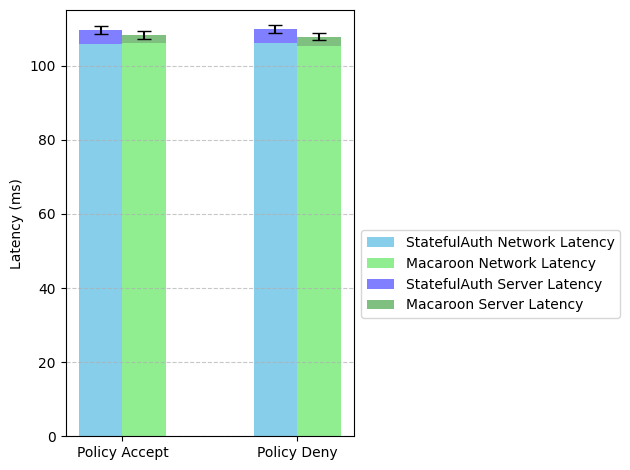

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
file_path = 'macaroon.csv'
data = pd.read_csv(file_path)

# Calculate net columns by subtracting as specified
data['Stateful Net Auth acc'] = data['"Stateful" Auth Request acc E2E Lat'] - data['"Stateful" Auth acc Server Side']
data['Macaroon Net Auth acc'] = data['Macaroon Request acc E2E Lat'] - data['Macaroon acc Server Side']
data['Stateful Net Auth deny'] = data['"Stateful" Auth Request deny E2E Lat'] - data['"Stateful" Auth deny Server Side']
data['Macaroon Net Auth deny'] = data['Macaroon Request deny E2E Lat'] - data['Macaroon deny Server Side']

# Define categories and their respective data for net latencies and server side latencies
categories = ['Policy Accept', 'Policy Deny']
net_stateful = [data['Stateful Net Auth acc'].mean(), data['Stateful Net Auth deny'].mean()]
net_macaroon = [data['Macaroon Net Auth acc'].mean(), data['Macaroon Net Auth deny'].mean()]
server_stateful = [data['"Stateful" Auth acc Server Side'].mean(), data['"Stateful" Auth deny Server Side'].mean()]
server_macaroon = [data['Macaroon acc Server Side'].mean(), data['Macaroon deny Server Side'].mean()]

errors_net_stateful = [data['Stateful Net Auth acc'].std(), data['Stateful Net Auth deny'].std()]
errors_net_macaroon = [data['Macaroon Net Auth acc'].std(), data['Macaroon Net Auth deny'].std()]

x = np.arange(len(categories))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots()
rects1_net = ax.bar(x - width/2, net_stateful, width, label='StatefulAuth Network Latency', color='skyblue')
rects2_net = ax.bar(x + width/2, net_macaroon, width, label='Macaroon Network Latency', color='lightgreen')

# Plotting the server side data on top of the net data
rects1_server = ax.bar(x - width/2, server_stateful, width, bottom=net_stateful, label='StatefulAuth Server Latency', yerr=errors_net_stateful, capsize=5, color='blue', alpha=0.5)
rects2_server = ax.bar(x + width/2, server_macaroon, width, bottom=net_macaroon, label='Macaroon Server Latency', yerr=errors_net_macaroon, capsize=5, color='green', alpha=0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Latency (ms)')
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Place the legend on the right side of the plot
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 115)  # Set y-axis limit for better visualization

fig.tight_layout()

plt.savefig('macaroon.pdf', format='pdf', bbox_inches='tight')
plt.show()